**Objective:**

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

**Deliverables:**


- Jupyter notebook containing the code for the PCA implementation.

- A report summarising the results of PCA and clustering analysis.

- Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.




**Additional Information:**

- You can use the python programming language.

- You can use any other machine learning libraries or tools as necessary.

- You can use any visualisation libraries or tools as necessary.

**Instructions:**

- Download the wine dataset from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Wine).

- Load the dataset into a Pandas dataframe.
Split the dataset into features and target variables.

- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

- Implement PCA on the preprocessed dataset using the scikit-learn library.

- Determine the optimal number of principal components to retain based on the explained variance ratio.

- Visualise the results of PCA using a scatter plot.

- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

- Interpret the results of PCA and clustering analysis.

# **Step 1: Downloading and Loading the Dataset**

In [1]:
import pandas as pd
import requests

# Downloading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
response = requests.get(url)

# Saving the dataset to a file
with open("wine_data.csv", "wb") as file:
    file.write(response.content)

# Loading the dataset into a Pandas DataFrame
column_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
                'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',
                'OD280/OD315_of_diluted_wines', 'Proline']

data = pd.read_csv("wine_data.csv", names=column_names)


# **Step 2: Preprocessing the Data**

In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target

# Data scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaled features


# **Step 3: Implementing PCA**

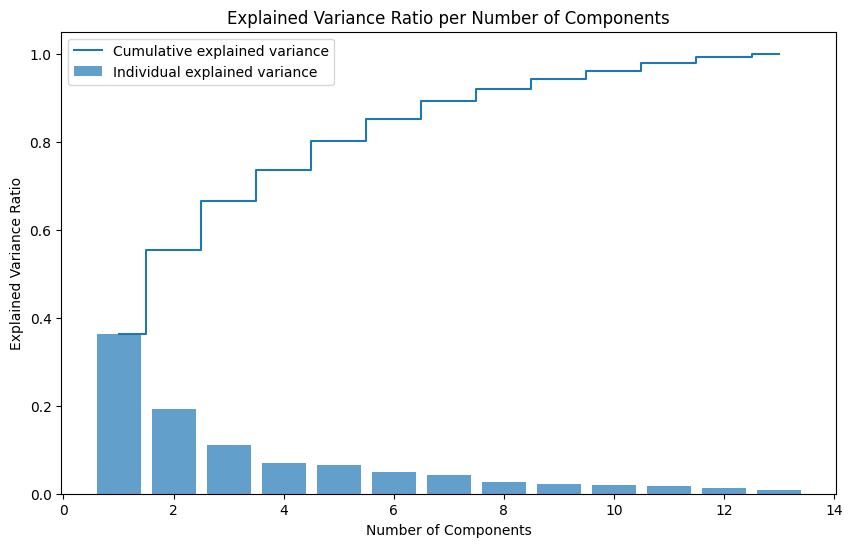

In [8]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

# Determine the number of components to retain
# You can plot explained variance or cumulative explained variance to decide
# Plotting explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_var) + 1), cumulative_var, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Number of Components')
plt.legend(loc='best')
plt.show()

# **Step 4: Visualizing PCA Results**

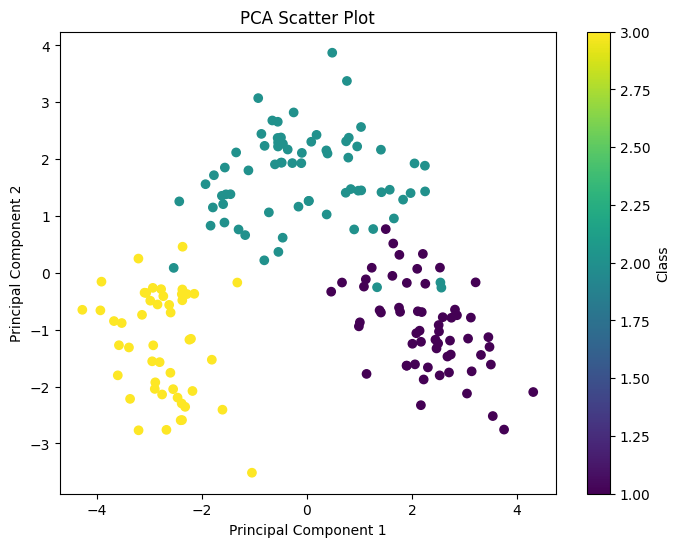

In [4]:
import matplotlib.pyplot as plt

# Scatter plot for PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar(label='Class')
plt.show()


# **Step 5: Performing Clustering (K-Means) on PCA-transformed Data**

In [5]:
from sklearn.cluster import KMeans

# Clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3)  # Assuming 3 classes as per the Wine dataset
cluster_labels = kmeans.fit_predict(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **1) Evaluate clustering performance using metrics like silhouette score, etc.**


# **2) Calculate performance metrics for the clustering algorithm**


In [6]:
from sklearn.metrics import silhouette_score

# Assuming cluster_labels contains the predicted cluster assignments from KMeans

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.28485891918989886


In [7]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Davies-Bouldin Index: 1.3891879777181637
Calinski-Harabasz Index: 70.94000800315129


# **Step 6: Interpretation and Reporting**


Summarize the results of PCA and clustering analysis in a report. Include the scatter plot for PCA visualization and the performance metrics for the clustering algorithm.

This breakdown should guide you through the implementation process. Feel free to adapt and expand on these steps to meet the assignment's requirements fully.





